# Les modèles : 

In [14]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns


from tensorflow import keras
from keras.utils import to_categorical, plot_model
from keras import Input
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Model, Sequential
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
  

SEED=42

In [15]:
data =pd.read_csv('/Users/florinepritzy/Documents/3 projets/cleaned_final.csv').reset_index(drop=True)

In [16]:
# split into input and output elements
X = data.drop(['Opiods Used','Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1) 
y = data['Opiods Used']

# 1) Undersampling les données
- 2 : with NearMiss 

In [17]:
SEED = 42
X_train, X_test, y_train, y_test=train_test_split(data.drop('Opiods Used', axis=1),
    data['Opiods Used'],test_size=0.2, stratify=data['Opiods Used'],
    shuffle=True,
    random_state=SEED)

#undersampling with NearMiss
SEED = 42
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)

X_train_miss : 21990 rows
// X_test : 24133 rows
// y_train_miss: 0= 10995/ 1 =10995
// y_test : 0 =21384 /1 =2749

In [18]:
X_train_miss.drop(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1, inplace=True)

In [21]:
X_test.drop(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1, inplace=True)

Standarize toutes nos données : 

In [23]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_miss)
X_test_std = scaler.transform(X_test)
X_std = scaler.fit_transform(X)

In [24]:
y_train = y_train_miss

# 2) Les modèles 

## Unsupervised learning 

In [13]:
X_kmeans 

,Claimant Age,Weekly Wage
0,41,513.86
1,49,1186.00
2,35,300.00
3,30,600.00
4,41,385.07
...,...,...
120656,62,1504.00
120657,50,200.00
120658,52,1258.46
120659,22,448.00


In [12]:
X_kmeans = pd.DataFrame(data[['Claimant Age','Weekly Wage']])
scaler = StandardScaler()
X_std = scaler.fit_transform(X_kmeans)

### 1) K-means : 
Only on numeric variable 
We cannot use the balanced database 


In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",  #standart version of Kmeans
    n_clusters=2,   #binary classification 
    n_init=11,      
    max_iter=300,
    random_state=42
  )

In [45]:
kmeans.fit(X_std)

KMeans(init='random', n_clusters=2, n_init=11, random_state=42)

The lowest Sum Square Error value : describe the quality of the model : very bad

In [21]:
kmeans.inertia_

146586.8821020094

Final locations of the centroid

In [22]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.87139633, -0.40539106],
       [ 0.74069089,  0.34458426]])

In [23]:
# The number of iterations required to converge
kmeans.n_iter_

9

Prediction : seems to be good for the 5 first prediction 

In [46]:
kmeans.labels_[:5]

array([0, 1, 0, 0, 0], dtype=int32)

In [47]:
import collections
labels = kmeans.labels_
collections.Counter(labels)

Counter({0: 55387, 1: 65274})

In [48]:
y.value_counts()

0    106917
1     13744
Name: Opiods Used, dtype: int64

In [25]:
y[:5]

0    0
1    1
2    0
3    0
4    0
Name: Opiods Used, dtype: int64

Graphique of the prediction label for 2 variables : Weekly Wage & Claimant Age cubic

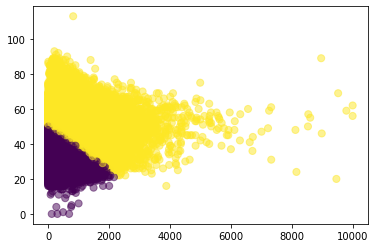

In [27]:
plt.scatter(X_kmeans['Weekly Wage'], X_kmeans['Claimant Age'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.show()

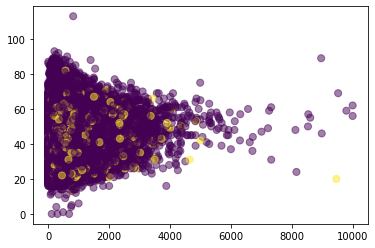

In [28]:
plt.scatter(X_kmeans['Weekly Wage'], X_kmeans['Claimant Age'], c= y.astype(float), s=50, alpha=0.5)
plt.show()

In [29]:
true_label = kmeans.labels_
true_label 

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

Choosing the Appropriate Number of Clusters : 
- Méthode 1 : The elbow method

In [30]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 11,
    "max_iter": 7,
    "random_state": SEED,
}

    # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)

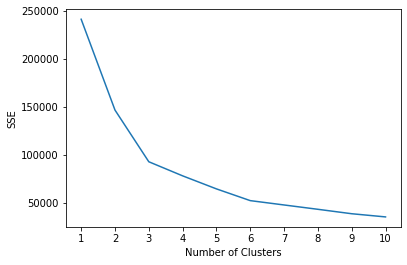

In [31]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

We can see that the good number of clusters is K=2 or K=3. Need another method  

- Method 2 : Sihouette coefficient 

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [32]:
# A list holds the silhouette coefficients for each k

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_std)
    score = silhouette_score(X_std, kmeans.labels_)
    silhouette_coefficients.append(score)

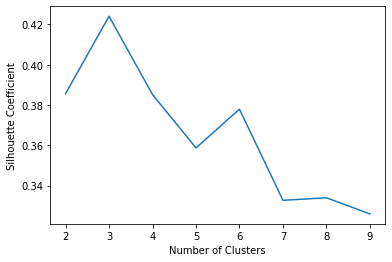

In [33]:
#plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

We can see that the number of cluster is 3. 

### Kmeans with K=3

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",  #standart version of Kmeans
    n_clusters=3,   #binary classification 
    n_init=11,      
    max_iter=300,
    random_state=42
  )

In [35]:
kmeans.fit(X_std)

KMeans(init='random', n_clusters=3, n_init=11, random_state=42)

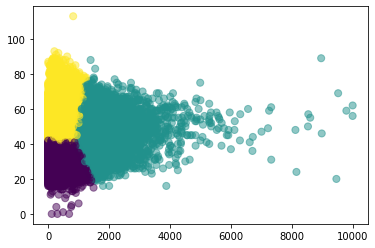

In [36]:
plt.scatter(X_kmeans['Weekly Wage'], X_kmeans['Claimant Age'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.show()

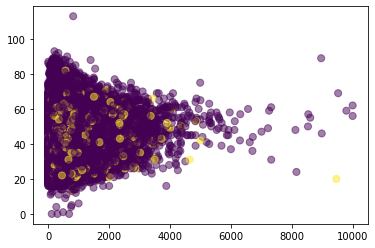

In [37]:
plt.scatter(X_kmeans['Weekly Wage'], X_kmeans['Claimant Age'], c= y.astype(float), s=50, alpha=0.5)
plt.show()

### With PCA : 

In [23]:
preprocessor = Pipeline(
[("scaler", StandardScaler()),
("pca", PCA(n_components=2, random_state=SEED)),]
)

In [24]:
preprocessor.fit(X_std)
model = preprocessor.steps[1][1]
model.explained_variance_ratio_

array([0.05464521, 0.01976705])

PCA n=2 explained 0,07 of the variance 

In [25]:
clusterer = Pipeline(
[("kmeans",
KMeans(n_clusters=2,init="k-means++",n_init=50,max_iter=500,random_state=SEED,),),]
)

In [26]:
pipe = Pipeline([
("preprocessor", preprocessor),
("clusterer", clusterer)]
)

In [27]:
pipe.fit(X_std)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=2, n_init=50,
                                         random_state=42))]))])

In [28]:
preprocessed_data = pipe["preprocessor"].transform(X_std)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

Evaluate the performance by calculating the silhouette coefficient:

In [29]:
silhouette_score(preprocessed_data, predicted_labels)

0.5481800344324262

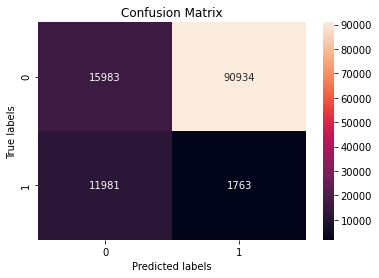

In [30]:
cm=confusion_matrix(y, predicted_labels)
 
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

Because our database is unbalanced, we cannot predict correclty the good cluster. We have lot of false positive because the positive class is under representing in our database. So we can see the disadvantage of this technique, which loses performance when the database is unbalanced. 

We use PCA, n=2 components, so we can also visualize the data in the context of the true labels and predicted labels. But we know in the previous results that PCA with n=2 explained only 0.06971022 of the variance. So the prediction of cluster will be very bad in the graph 

/Users/florinepritzy/opt/anaconda3/envs/Keras/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


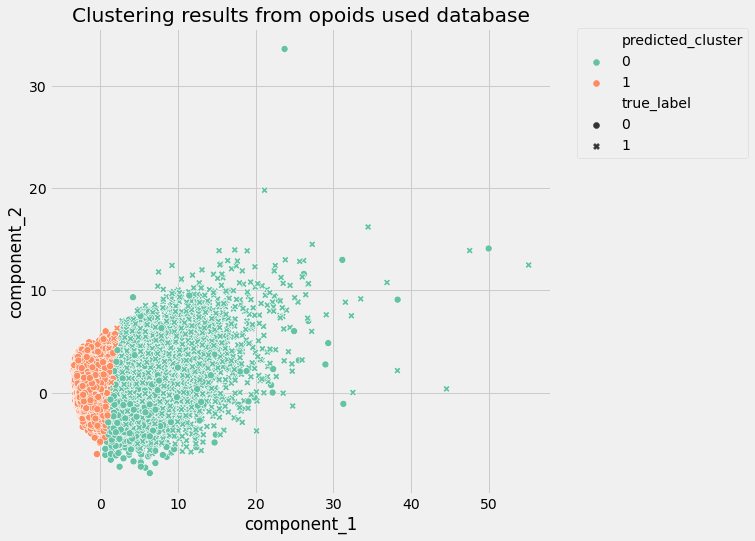

In [31]:
pcadf = pd.DataFrame(
pipe["preprocessor"].transform(X_std),
columns=["component_1", "component_2"],)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = y

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
"component_1","component_2",s=50,data=pcadf,hue="predicted_cluster",
style="true_label",palette="Set2",)

scat.set_title("Clustering results from opoids used database")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

## Supervised learning 

### 2) Logistic regression : Gradient Descent Optimizer : 

Implementation of Logistic Regression using gradient descent optimizer : defined the model and try different learning rate = 0.0001, 0.001, 0.003, 0.005 and the max of n_iters  

In [35]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=15000, random_state=SEED): #init method = same as linear function with learning rate/ nb_iteration
        self.lr = lr  #store it
        self.n_iters = n_iters
        self.weights = None  #for gradient descent need weight and bias 
        self.bias = None

    def fit(self, X, y):    #training sample and true labels. X = np vector = n*m (number samples*number features) 
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)  #random number of 0 to initialize 
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias  # f(w,b)= wx + b 
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)  #appli sigmoid function to get probability

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  #compute derivative of w
            db = (1 / n_samples) * np.sum(y_predicted - y)    #compute derivative of b
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias  # f(w,b)= wx + b = approximate data with linear model
        y_predicted = self._sigmoid(linear_model)  #approximation of y 
        # wants to say if it's class 1 or 0 : larger than 0.5 class 1, lower class 0 
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):  #formula s(x)= 1/1+e-X
        return 1 / (1 + np.exp(-x))
 

To explain the code :
- Step 1 : we initialize the learning rate, the weight and the biais. We approximate the linear model with f(w,b) = wx + b a,d after we applied the sigmoid function to this linear model. 
- Step 2 : Calculate the partial derivative of loss function with respect to m and c 
First to m = differentiate the functions for only terms containing M and consider everything else to be a constant 
Second to c = partial derivative with c 
- Step 3 : Update current value of m ad c using these equations = m = m - L x Dm
c= c - L x Dc

Repeats this process until Loss = 0. 



In [33]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

Train and predict the model : 

In [36]:
model = LogisticRegression(lr=0.003, n_iters=15000, random_state=SEED)
model.fit(X_train_std, y_train)
preds = model.predict(X_test_std)

##### Metrics on the training set

In [37]:
accuracy_score(y_train, model.predict(X_train_std))

0.9678035470668486

In [38]:
roc_auc_score(y_train, model.predict(X_train_std))

0.9678035470668486

In [39]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_train, model.predict(X_train_std))

0.9356175578755301

##### Metrics on the testing set

In [40]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, preds)
accuracy_test #we cannot interpret for test set

0.8867940164919405

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict(X_test_std))

0.9201117261699897

In [42]:
matthews_corrcoef(y_test, model.predict(X_test_std))

0.6457271691234925

##### MSE

In [43]:
mse = mean_squared_error(y_test, preds)
print("MSE:", mse)

MSE: 0.11320598350805951


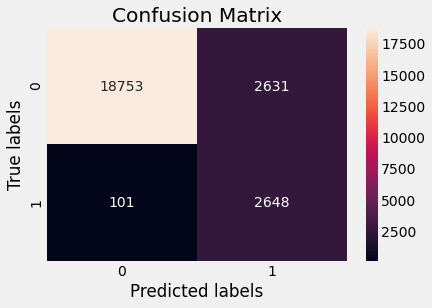

In [44]:
cm=confusion_matrix(y_test,preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

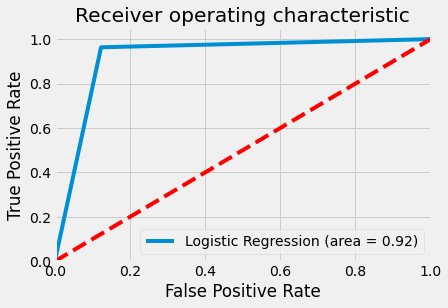

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test,preds)
fpr, tpr, thresholds = roc_curve(y_test,preds)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 3) Neural Networks : 

In [25]:
y_train2 = to_categorical(y_train, num_classes=2)
y_test2= to_categorical(y_test, num_classes=2)

The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.
Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice. The function is differentiable.That means, we can find the slope of the sigmoid curve at any two points. The function is monotonic but function’s derivative is not.
Other functions:
- The logistic sigmoid function can cause a neural network to get stuck at the training time.
- The softmax function is a more generalized logistic activation function which is used for multiclass classification. Generally, we use softmax activation instead of sigmoid with the cross-entropy loss because softmax activation distributes the probability throughout each output node. But, since it is a binary classification, using sigmoid is same as softmax. For multi-class classification use sofmax with cross-entropy.

However, with softmax function the performance of our model is better, so we decided to keep going with softmax function.


#### Training the model : 

In [26]:
num_class_interger = 2  # 
xi = Input(shape=(140,))
xo = Dense(num_class_interger)(xi)
yo = Activation('softmax')(xo)
model1 = Model(inputs=[xi], outputs=[yo])

In [27]:
model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 140)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 282       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 282
Trainable params: 282
Non-trainable params: 0
_________________________________________________________________


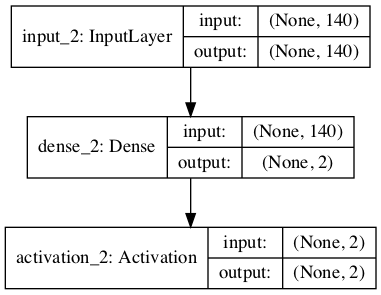

In [28]:
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

The model has to provide a loss function to be minimized. Learning optimal model parameters involves minimizing a loss function. Here we use the binary crossentropy loss. Here we ae going to use optimization algorithms named ADAM that requires the tuning of learning rate.
Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter.
Adam can be looked at as a combination of RMSprop (RMSprop is a gradient based optimization technique used in training neural networks) and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself.
- Advantages of ADAM:
The method is too fast and converges rapidly.
Rectifies vanishing learning rate, high variance.
- Disadvantages of ADAM:
Computationally costly

In [29]:
model1.compile(loss='binary_crossentropy', 
              optimizer='adam',  
              metrics=['accuracy'])

We are training our classifier, by calling the fit function. epoch represent the modeling capacity of your model. We used in this example 10% of the training set to validate.

In [30]:
history = model1.fit(X_train_std, y_train2,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

score = model1.evaluate(X_test_std, y_test2, verbose=0)
print('NETWORK PERFORMANCE ON THE OPOIDS TEST :')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 17592 samples, validate on 4398 samples
Epoch 1/10
17592/17592 [==============================] - 1s 67us/step - loss: 0.3554 - accuracy: 0.8491 - val_loss: 0.2423 - val_accuracy: 0.8886
Epoch 2/10
17592/17592 [==============================] - 1s 44us/step - loss: 0.1385 - accuracy: 0.9478 - val_loss: 0.1622 - val_accuracy: 0.9332
Epoch 3/10
17592/17592 [==============================] - 1s 40us/step - loss: 0.1079 - accuracy: 0.9594 - val_loss: 0.1328 - val_accuracy: 0.9488
Epoch 4/10
17592/17592 [==============================] - 1s 41us/step - loss: 0.0948 - accuracy: 0.9646 - val_loss: 0.1190 - val_accuracy: 0.9532
Epoch 5/10
17592/17592 [==============================] - 1s 42us/step - loss: 0.0878 - accuracy: 0.9671 - val_loss: 0.1106 - val_accuracy: 0.9566
Epoch 6/10
17592/17592 [==============================] - 1s 45us/step - loss: 0.0836 - accuracy: 0.9680 - val_loss: 0.1040 - val_accuracy: 0.95980836 - accuracy: 0.96
Epoch 7/10
17592/17592 [========================

At the end of the 10th epoch, we see that we are getting ~95% accuracy on the training data and ~89% accuracy on the testing data.

In [52]:
print(history)

#### Showing the model accuracy

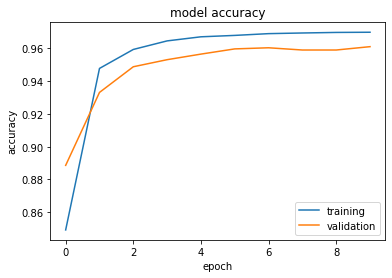

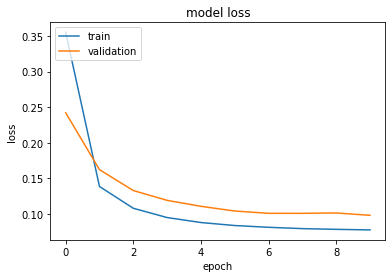

In [31]:
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.plot(training_acc)
plt.plot(test_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [54]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


#### Evaluate the model :

In [32]:
y_pred = model1.predict(X_test_std)

In [33]:
roc = roc_auc_score(y_test2, y_pred)
roc

0.9811056773765435

In [34]:
print("For test data set; Loss: ",score[0]," Accuracy: ", score[1])

For test data set; Loss:  0.2532148298859965  Accuracy:  0.9136037826538086


#### Make Predictions :

In [35]:
y_pred = model1.predict(X_test_std)
y_predicted_class=np.argmax(y_pred,axis=1)
y_predicted_class[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [36]:
y_test2[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [38]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_predicted_class,y_test)

0.6995655105026459

In [39]:
accuracy_score(y_predicted_class,y_test)

0.9136037790577218

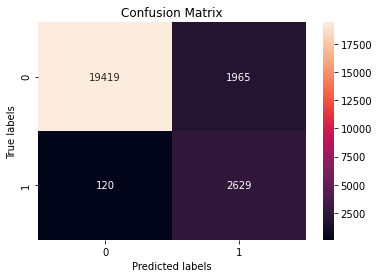

In [40]:
cm=confusion_matrix(y_test,y_predicted_class)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

#### MSE

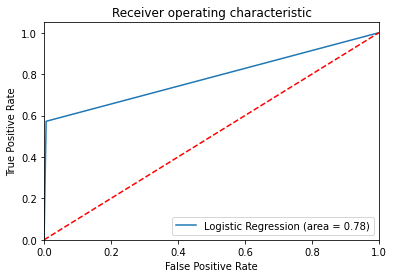

In [42]:
logit_roc_auc = roc_auc_score(y_predicted_class,y_test)
fpr, tpr, thresholds = roc_curve(y_predicted_class,y_test)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()